In [1]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator


import tensorflow



In [28]:
import numpy as np

# import matplotlib.pyplot as plt

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
train_dir = "/Users/ahmedibrahim/Desktop/Mids/Spring23/machine_learning/ML3/Team-8-Machine-Learning/CNN_data_Echo/Noise_removed_Echo/noise_train" # Directory containing the training data


test_dir = "/Users/ahmedibrahim/Desktop/Mids/Spring23/machine_learning/ML3/Team-8-Machine-Learning/CNN_data_Echo/Noise_removed_Echo/noise_test" # Directory containing the validation data

In [31]:
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

In [5]:
pip list |grep keras

keras                         2.11.0
Note: you may need to restart the kernel to use updated packages.


In [32]:
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)


Found 25430 images belonging to 7 classes.
Found 1410 images belonging to 7 classes.


- CNN Model

In [35]:
from PIL import Image

from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf 

# Define the model architecture
model = Sequential()

# Add a convolutional layer with 32 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
# Add a batch normalization layer
model.add(BatchNormalization())
# Add a second convolutional layer with 64 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add a second batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
# model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0001), metrics=['accuracy']) -- original lr = 0.0001


model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(lr=0.0002), metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint

import sklearn

from sklearn.preprocessing import LabelEncoder


# Define the callback
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint_callback]
)

Epoch 1/50
398/398 [==============================] - ETA: 0s - loss: 1.9866 - accuracy: 0.3246
Epoch 1: val_accuracy improved from -inf to 0.01489, saving model to model_weights.h5
398/398 [==============================] - 104s 260ms/step - loss: 1.9866 - accuracy: 0.3246 - val_loss: 7.2823 - val_accuracy: 0.0149
Epoch 2/50
398/398 [==============================] - ETA: 0s - loss: 1.4347 - accuracy: 0.4484
Epoch 2: val_accuracy improved from 0.01489 to 0.40142, saving model to model_weights.h5
398/398 [==============================] - 106s 266ms/step - loss: 1.4347 - accuracy: 0.4484 - val_loss: 1.7462 - val_accuracy: 0.4014
Epoch 3/50
398/398 [==============================] - ETA: 0s - loss: 1.2518 - accuracy: 0.5185
Epoch 3: val_accuracy improved from 0.40142 to 0.48227, saving model to model_weights.h5
398/398 [==============================] - 103s 258ms/step - loss: 1.2518 - accuracy: 0.5185 - val_loss: 1.3494 - val_accuracy: 0.4823
Epoch 4/50
398/398 [=======================

### Evaluation ###

In [37]:
# # save model

# model.save('/Users/ahmedibrahim/Desktop/Mids/Spring23/machine_learning/ML_Project2/Team-8-Machine-Learning/CNN/model.h5')


# model.save("/Users/ahmedibrahim/Desktop/Mids/Spring23/machine_learning/ML3/Team-8-Machine-Learning/Noise_filtered/model2.h5")


model.save('/Users/ahmedibrahim/Desktop/Mids/Spring23/machine_learning/ML3/Team-8-Machine-Learning/CNN_data_Echo/Noise_removed_Echo/model_weights/model_echo.h5')

model.save_weights('/Users/ahmedibrahim/Desktop/Mids/Spring23/machine_learning/ML3/Team-8-Machine-Learning/CNN_data_Echo/Noise_removed_Echo/model_weights/model_weights_echo.h5')




In [38]:
loaded_model = tf.keras.models.load_model('/Users/ahmedibrahim/Desktop/Mids/Spring23/machine_learning/ML3/Team-8-Machine-Learning/CNN_data_Echo/Noise_removed_Echo/model_weights/model_echo.h5')

loaded_model.load_weights('/Users/ahmedibrahim/Desktop/Mids/Spring23/machine_learning/ML3/Team-8-Machine-Learning/CNN_data_Echo/Noise_removed_Echo/model_weights/model_weights_echo.h5')

# loaded_model = tf.keras.models.load_model('model2.h5')

# loaded_model.load_weights('model2_weights.h5')

# Evaluate the model on the test data using `evaluate`

print("Evaluate on test data")

results = loaded_model.evaluate(validation_generator, batch_size=128)

print("test loss, test acc:", results)



Evaluate on test data
23/23 [==============================] - 2s 66ms/step - loss: 1.2267 - accuracy: 0.6262
test loss, test acc: [1.2267110347747803, 0.626241147518158]


- Training and validation loss curves

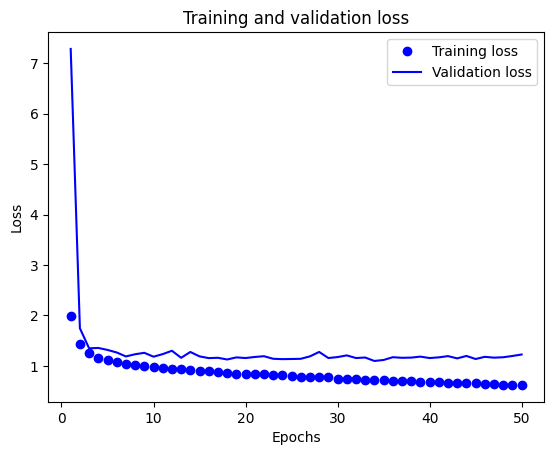

In [39]:
# Plot the train and validation loss

import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


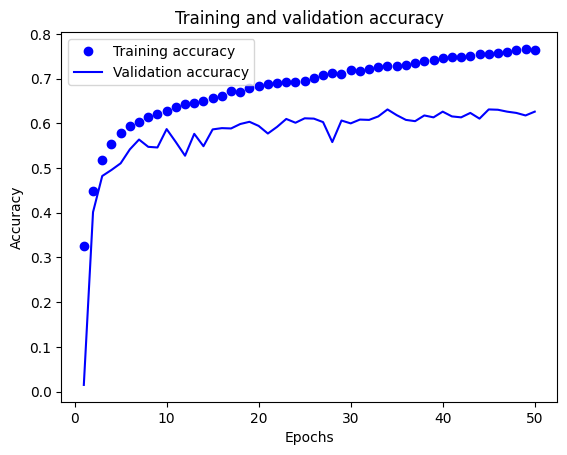

In [40]:
# Plot the train and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

23/23 [==============================] - 2s 66ms/step


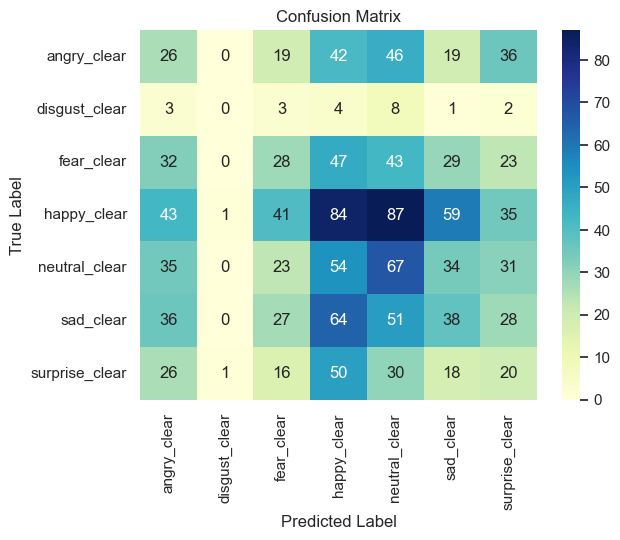

In [41]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Get the true labels and predicted labels for the validation set
validation_labels = validation_generator.classes
validation_pred_probs = model.predict(validation_generator)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from tensorflow.keras.utils import plot_model

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Plot the model architecture
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
